<a href="https://colab.research.google.com/github/panda6999/Simulation-and-Modeling-Lab-Report/blob/main/lab_report06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MD.HABIBUL BASHAR

ID: 2215151046

BATCH: 51(A2)


1.Perform a simulation for 200 customers with λ=3and μ=4. Calculate and compare the
waiting time and server utilization.

Problem 1 (λ = 3, μ = 4)
Average Waiting Time: 31.843
Server Utilization: 0.7808


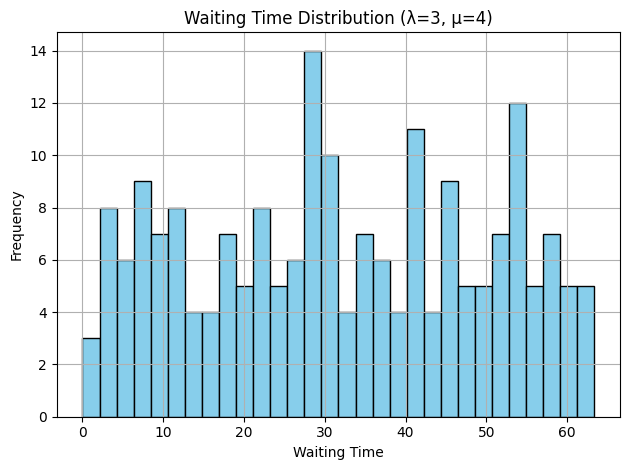

In [20]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# parameters
lambda1 = 3
mu1= 4
n_customers = 200

# generate inter-arrival times and service times
inter_arrival_times = np.random.exponential(1/lambda1, n_customers)
service_times = np.random.exponential(1/mu1, n_customers)

# initialize arrival and service start times
arrival_times = np.cumsum(inter_arrival_times)
start_times = np.zeros(n_customers)
end_times = np.zeros(n_customers)
waiting_times = np.zeros(n_customers)

start_times [0] = arrival_times[0]
end_times[0] = start_times[0] + service_times[0]

for i in range(1, n_customers):

    start_times[i] = max(arrival_times[i], end_times[i-1])
    end_times[i] = start_times [i] + service_times[i]
    waiting_times [i] = start_times[i] + service_times[i]

# metrics
avg_wait1 = np.mean(waiting_times)
utilization1 = np.sum(service_times) / end_times[-1]

print("Problem 1 (λ = 3, μ = 4)")
print("Average Waiting Time:", round(avg_wait1, 4))
print("Server Utilization:", round(utilization1, 4))

plt.hist(waiting_times, bins=30, color='skyblue', edgecolor='black')
plt.title("Waiting Time Distribution (λ=3, μ=4)")
plt.xlabel("Waiting Time")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

2.Simulate a system with λ=8 and μ=6. Discuss the impact of server overload on system
performance.


Problem 2 (λ = 8, μ = 6)
Average Waiting Time: 5.0384
Server Utilization: 0.993


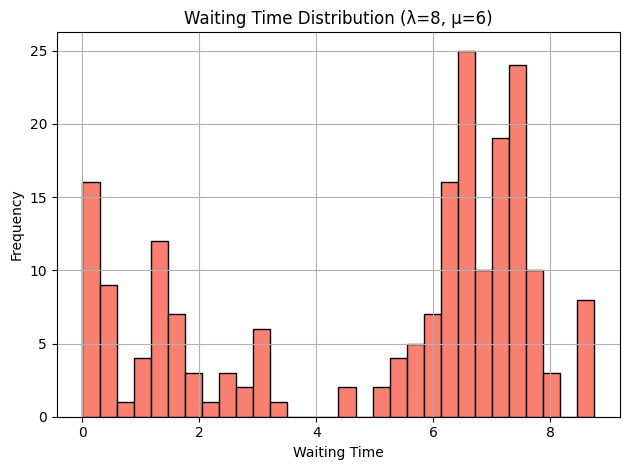

In [23]:
lambda2 = 8
mu = 6

inter_arrival_times2 = np.random.exponential(1/lambda2, n_customers)
service_times2 = np.random.exponential(1/mu, n_customers)
arrival_times2 = np.cumsum(inter_arrival_times2)

start2_times2 = np.zeros(n_customers)
end_times2 = np.zeros(n_customers)
waiting_times2 = np.zeros(n_customers)


start2_times2 [0] = arrival_times2[0]
end_times2[0] = start2_times2[0] + service_times2[0]
waiting_times2[0] = 0

for i in range(1, n_customers):
  start2_times2[i] = max(arrival_times2[i], end_times2[i-1])
  end_times2[i] = start2_times2[i] + service_times2[i]
  waiting_times2[i] = start2_times2[i] - arrival_times2[i]

avg_wait2 = np.mean(waiting_times2)
utilization2 = np.sum(service_times2) / end_times2[-1]

print("\nProblem 2 (λ = 8, μ = 6)")
print("Average Waiting Time:", round(avg_wait2, 4))
print("Server Utilization:", round(utilization2, 4))

plt.hist(waiting_times2, bins=30, color='salmon', edgecolor='black')
plt.title("Waiting Time Distribution (λ=8, μ=6)")
plt.xlabel("Waiting Time")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


3.Modify the program to include a limited queue capacity (e.g., maximum 10 customers).
Analyze how this affects the performance metrics.


λ=3, μ=4 with Queue Limit = 10:
Average Waiting Time: 0.4192 units
Server Utilization: 0.7396
Customers Served: 200
Customers Rejected: 0


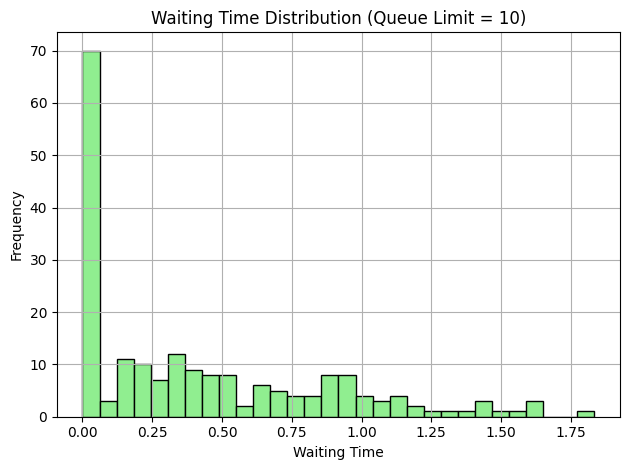

In [24]:
queue_limit = 10

arrival_times3 = np.cumsum(np.random.exponential(1/lambda1, n_customers))
service_times3 = np.random.exponential(1/mu1, n_customers)

start_times3 = []
end_times3 = []
waiting_times3 = []

queue = []

time = 0
served = 0
rejected = 0

for i in range(n_customers):
  arrival = arrival_times3[i]
  service = service_times3[i]

# remove finished customers
  queue = [e for e in queue if e > arrival]

  if len(queue) < queue_limit:
    if not queue:
      start = arrival
    else:
        start = queue[-1]
    end = start + service
    queue.append(end)

    start_times3.append(start)
    end_times3.append(end)
    waiting_times3.append(start - arrival)
    served += 1
  else:
    rejected += 1

average_waiting3 = np.mean(waiting_times3)
utilization3 = np.sum(service_times3[:served]) / (end_times3[-1] if end_times3 else 1)

print(f"\nλ=3, μ=4 with Queue Limit = {queue_limit}:")
print(f"Average Waiting Time: {average_waiting3:.4f} units")
print(f"Server Utilization: {utilization3:.4f}")
print(f"Customers Served: {served}")
print(f"Customers Rejected: {rejected}")

plt.hist(waiting_times3, bins=30, color='lightgreen', edgecolor='black')
plt.title("Waiting Time Distribution (Queue Limit = 10)")
plt.xlabel("Waiting Time")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

